In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df0 = pd.read_csv('건물_30년 이하.csv')
df0

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470266,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
470267,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,250000
470268,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
470269,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [64]:
df0.drop(columns = ['건물연식'], inplace= True)

### Train/Test Split

In [65]:
# Train : 2016-2020
# Test : 2021-2022

df0['계약일'] = pd.to_datetime(df0['계약일'])

In [66]:
train_df = df0.loc[df0['계약일'] < '2021']

In [67]:
test_df = df0.loc[df0['계약일'] >= '2021']

### feature & target split

In [68]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [69]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

### Scaling
    - Features -MinMax
    - Target - Log

In [70]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [71]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

399405    4.716003
399406    4.722634
399407    4.380211
399408    5.079181
399409    4.361728
            ...   
470266    5.054996
470267    5.397940
470268    5.235528
470269    4.568202
470270    4.883661
Name: 물건금액(만원), Length: 70866, dtype: float64

In [72]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 2.676e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:51:50   Log-Likelihood:             1.4497e+05
No. Observations:              399405   AIC:                        -2.899e+05
Df Residuals:                  399386   BIC:                        -2.897e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5442      0.008    543.630      0.000       4.528       4.561
건물면적(㎡)               2.1477      0.004    570.703      0.000       2.140       2.155
층                     0.3669      0.003    119.035      0.000       0.361       0.373
KOSPI종가               0.0349      0.006      5.388      0.000       0.022       0.048
Fed기준금리              -0.1153      0.004    -30.830      0.000      -0.123      -0.108
국제유가(Dubai)($/배럴)     0.1265      0.004     34.449      0.000       0.119       0.134
부동산거래량                0.0249      0.002     12.524      0.000       0.021       0.029
국고채5년(평균)            -0.1831      0.020     -9.207      0.000      -0.222      -0.144
국고채10년(평균)            0.1659      0.014     11.477      0.000       0.138       0.194
회사채3년(평균)             0.1036      0.006     17.667      0.000       0.092       0.115
CD91물(평균)            -0.0670      0.009     -7.838      0.000      -0.084      -0.050
BOK기준금리              -0.1007      0.007    -14.129      0.000      -0.115      -0.087
GDP대비가계부채비율           0.0037      0.006      0.611      0.542      -0.008       0.016
환율종가                  0.0178      0.003      5.664      0.000       0.012       0.024
선행지수순환변동치             0.1018      0.005     21.508      0.000       0.092       0.111
EPU                  -0.0045      0.002     -2.323      0.020      -0.008      -0.001
장단기금리spread          -0.2236      0.009    -24.878      0.000      -0.241      -0.206
금값종가                 -0.0301      0.006     -5.103      0.000      -0.042      -0.019
LTV                  -0.2423      0.002   -112.253      0.000      -0.247      -0.238
==============================================================================
Omnibus:                     5598.017   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6483.699
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       3.397   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_scaled.drop(columns = ['GDP대비가계부채비율'], inplace=True)

In [74]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:51:51   Log-Likelihood:             1.4497e+05
No. Observations:              399405   AIC:                        -2.899e+05
Df Residuals:                  399387   BIC:                        -2.897e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5449      0.008    550.089      0.000       4.529       4.561
건물면적(㎡)               2.1476      0.004    571.478      0.000       2.140       2.155
층                     0.3668      0.003    119.040      0.000       0.361       0.373
KOSPI종가               0.0350      0.006      5.399      0.000       0.022       0.048
Fed기준금리              -0.1142      0.003    -35.061      0.000      -0.121      -0.108
국제유가(Dubai)($/배럴)     0.1269      0.004     35.379      0.000       0.120       0.134
부동산거래량                0.0250      0.002     12.643      0.000       0.021       0.029
국고채5년(평균)            -0.1864      0.019     -9.748      0.000      -0.224      -0.149
국고채10년(평균)            0.1679      0.014     11.927      0.000       0.140       0.195
회사채3년(평균)             0.1046      0.006     18.610      0.000       0.094       0.116
CD91물(평균)            -0.0665      0.009     -7.814      0.000      -0.083      -0.050
BOK기준금리              -0.1021      0.007    -15.100      0.000      -0.115      -0.089
환율종가                  0.0178      0.003      5.660      0.000       0.012       0.024
선행지수순환변동치             0.1018      0.005     21.536      0.000       0.093       0.111
EPU                  -0.0044      0.002     -2.277      0.023      -0.008      -0.001
장단기금리spread          -0.2235      0.009    -24.871      0.000      -0.241      -0.206
금값종가                 -0.0280      0.005     -5.861      0.000      -0.037      -0.019
LTV                  -0.2428      0.002   -121.403      0.000      -0.247      -0.239
==============================================================================
Omnibus:                     5596.028   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6480.417
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       3.397   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [76]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      6.391825            건물면적(㎡)
1      4.977302                  층
2    155.743112            KOSPI종가
3     39.611830            Fed기준금리
4     63.089319  국제유가(Dubai)($/배럴)
5     10.745558             부동산거래량
6   1014.874158          국고채5년(평균)
7    790.486677         국고채10년(평균)
8    117.580574          회사채3년(평균)
9    269.828959          CD91물(평균)
10   237.657317            BOK기준금리
11    26.926167               환율종가
12   124.523475          선행지수순환변동치
13     5.389602                EPU
14   202.983321        장단기금리spread
15    36.122488               금값종가
16    26.334859                LTV


In [77]:
X_scaled.drop(columns = ['국고채5년(평균)'], inplace=True)

In [78]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 3.009e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:52:16   Log-Likelihood:             1.4492e+05
No. Observations:              399405   AIC:                        -2.898e+05
Df Residuals:                  399388   BIC:                        -2.896e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5883      0.007    658.801      0.000       4.575       4.602
건물면적(㎡)               2.1471      0.004    571.334      0.000       2.140       2.154
층                     0.3667      0.003    118.989      0.000       0.361       0.373
KOSPI종가               0.0336      0.006      5.183      0.000       0.021       0.046
Fed기준금리              -0.1193      0.003    -37.091      0.000      -0.126      -0.113
국제유가(Dubai)($/배럴)     0.1283      0.004     35.783      0.000       0.121       0.135
부동산거래량                0.0261      0.002     13.250      0.000       0.022       0.030
국고채10년(평균)            0.0599      0.009      6.896      0.000       0.043       0.077
회사채3년(평균)             0.0911      0.005     16.717      0.000       0.080       0.102
CD91물(평균)            -0.0990      0.008    -12.635      0.000      -0.114      -0.084
BOK기준금리              -0.1395      0.006    -25.077      0.000      -0.150      -0.129
환율종가                  0.0292      0.003      9.991      0.000       0.023       0.035
선행지수순환변동치             0.1072      0.005     22.822      0.000       0.098       0.116
EPU                  -0.0081      0.002     -4.334      0.000      -0.012      -0.004
장단기금리spread          -0.2820      0.007    -42.208      0.000      -0.295      -0.269
금값종가                 -0.0331      0.005     -6.984      0.000      -0.042      -0.024
LTV                  -0.2413      0.002   -120.996      0.000      -0.245      -0.237
==============================================================================
Omnibus:                     5588.728   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6455.564
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       3.393   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.371820            건물면적(㎡)
1     4.969527                  층
2   149.717783            KOSPI종가
3    38.388548            Fed기준금리
4    62.598541  국제유가(Dubai)($/배럴)
5    10.727709             부동산거래량
6   241.976049         국고채10년(평균)
7   113.185835          회사채3년(평균)
8   268.045191          CD91물(평균)
9   188.042738            BOK기준금리
10   16.215004               환율종가
11  120.931532          선행지수순환변동치
12    5.346163                EPU
13  154.308831        장단기금리spread
14   35.089041               금값종가
15   23.628029                LTV


In [80]:
X_scaled.drop(columns = ['CD91물(평균)'], inplace=True)

In [81]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 3.207e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:52:56   Log-Likelihood:             1.4484e+05
No. Observations:              399405   AIC:                        -2.896e+05
Df Residuals:                  399389   BIC:                        -2.895e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5409      0.006    773.453      0.000       4.529       4.552
건물면적(㎡)               2.1476      0.004    571.395      0.000       2.140       2.155
층                     0.3667      0.003    118.951      0.000       0.361       0.373
KOSPI종가               0.0547      0.006      8.720      0.000       0.042       0.067
Fed기준금리              -0.1257      0.003    -39.575      0.000      -0.132      -0.119
국제유가(Dubai)($/배럴)     0.1299      0.004     36.251      0.000       0.123       0.137
부동산거래량                0.0230      0.002     11.761      0.000       0.019       0.027
국고채10년(평균)           -0.0070      0.007     -1.016      0.309      -0.020       0.006
회사채3년(평균)             0.1117      0.005     21.483      0.000       0.102       0.122
BOK기준금리              -0.1850      0.004    -43.575      0.000      -0.193      -0.177
환율종가                  0.0348      0.003     12.054      0.000       0.029       0.040
선행지수순환변동치             0.1286      0.004     29.343      0.000       0.120       0.137
EPU                  -0.0069      0.002     -3.662      0.000      -0.011      -0.003
장단기금리spread          -0.2628      0.007    -40.384      0.000      -0.276      -0.250
금값종가                 -0.0282      0.005     -5.965      0.000      -0.037      -0.019
LTV                  -0.2399      0.002   -120.464      0.000      -0.244      -0.236
==============================================================================
Omnibus:                     5641.448   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6513.656
Skew:                           0.243   Prob(JB):                         0.00
Kurtosis:                       3.394   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_scaled.drop(columns = ['국고채10년(평균)'], inplace=True)

In [83]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.336882            건물면적(㎡)
1     4.953819                  층
2   143.443648            KOSPI종가
3    36.009203            Fed기준금리
4    62.309209  국제유가(Dubai)($/배럴)
5    10.500516             부동산거래량
6    52.530251          회사채3년(평균)
7    39.887683            BOK기준금리
8    15.244471               환율종가
9    86.045808          선행지수순환변동치
10    5.324504                EPU
11  142.421917        장단기금리spread
12   27.159042               금값종가
13   22.268613                LTV


In [84]:
X_scaled.drop(columns = ['KOSPI종가'], inplace=True)

In [85]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 3.700e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:54:25   Log-Likelihood:             1.4480e+05
No. Observations:              399405   AIC:                        -2.896e+05
Df Residuals:                  399391   BIC:                        -2.894e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5591      0.005    842.211      0.000       4.549       4.570
건물면적(㎡)               2.1470      0.004    571.286      0.000       2.140       2.154
층                     0.3666      0.003    118.905      0.000       0.361       0.373
Fed기준금리              -0.1258      0.003    -40.466      0.000      -0.132      -0.120
국제유가(Dubai)($/배럴)     0.1339      0.004     37.669      0.000       0.127       0.141
부동산거래량                0.0270      0.002     14.175      0.000       0.023       0.031
회사채3년(평균)             0.1240      0.004     34.256      0.000       0.117       0.131
BOK기준금리              -0.1894      0.004    -49.542      0.000      -0.197      -0.182
환율종가                  0.0270      0.003      9.872      0.000       0.022       0.032
선행지수순환변동치             0.1522      0.003     54.444      0.000       0.147       0.158
EPU                  -0.0083      0.002     -4.465      0.000      -0.012      -0.005
장단기금리spread          -0.2836      0.006    -49.145      0.000      -0.295      -0.272
금값종가                 -0.0096      0.004     -2.335      0.020      -0.018      -0.002
LTV                  -0.2453      0.002   -129.565      0.000      -0.249      -0.242
==============================================================================
Omnibus:                     5627.522   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6504.505
Skew:                           0.242   Prob(JB):                         0.00
Kurtosis:                       3.395   Cond. No.                         59.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.331869            건물면적(㎡)
1     4.949383                  층
2    36.004959            Fed기준금리
3    60.560598  국제유가(Dubai)($/배럴)
4     9.772645             부동산거래량
5    45.908264          회사채3년(평균)
6    36.837259            BOK기준금리
7    15.023595               환율종가
8    43.295590          선행지수순환변동치
9     5.318318                EPU
10  134.889958        장단기금리spread
11    9.483563               금값종가
12   21.656480                LTV


In [87]:
X_scaled.drop(columns = ['장단기금리spread'], inplace=True)

In [88]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 3.964e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:55:18   Log-Likelihood:             1.4359e+05
No. Observations:              399405   AIC:                        -2.872e+05
Df Residuals:                  399392   BIC:                        -2.870e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4617      0.005    883.111      0.000       4.452       4.472
건물면적(㎡)               2.1495      0.004    570.281      0.000       2.142       2.157
층                     0.3682      0.003    119.089      0.000       0.362       0.374
Fed기준금리              -0.0821      0.003    -27.478      0.000      -0.088      -0.076
국제유가(Dubai)($/배럴)     0.0896      0.003     25.971      0.000       0.083       0.096
부동산거래량                0.0050      0.002      2.700      0.007       0.001       0.009
회사채3년(평균)            -0.0349      0.002    -21.328      0.000      -0.038      -0.032
BOK기준금리              -0.1062      0.003    -30.880      0.000      -0.113      -0.099
환율종가                  0.0287      0.003     10.454      0.000       0.023       0.034
선행지수순환변동치             0.0588      0.002     28.603      0.000       0.055       0.063
EPU                  -0.0184      0.002     -9.888      0.000      -0.022      -0.015
금값종가                  0.0599      0.004     15.399      0.000       0.052       0.068
LTV                  -0.2246      0.002   -121.315      0.000      -0.228      -0.221
==============================================================================
Omnibus:                     5807.766   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6643.176
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                       3.384   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.320454            건물면적(㎡)
1     4.945394                  층
2    32.329148            Fed기준금리
3    53.549438  국제유가(Dubai)($/배럴)
4     8.788182             부동산거래량
5    10.032748          회사채3년(평균)
6    34.126389            BOK기준금리
7    14.086335               환율종가
8    17.997454          선행지수순환변동치
9     5.170849                EPU
10    9.442812               금값종가
11   21.516668                LTV


In [90]:
X_scaled.drop(columns = ['국제유가(Dubai)($/배럴)'], inplace=True)

In [91]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                 4.311e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:56:00   Log-Likelihood:             1.4326e+05
No. Observations:              399405   AIC:                        -2.865e+05
Df Residuals:                  399393   BIC:                        -2.864e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4986      0.005    927.129      0.000       4.489       4.508
건물면적(㎡)        2.1504      0.004    570.091      0.000       2.143       2.158
층              0.3683      0.003    118.998      0.000       0.362       0.374
Fed기준금리       -0.0344      0.002    -14.595      0.000      -0.039      -0.030
부동산거래량         0.0196      0.002     11.057      0.000       0.016       0.023
회사채3년(평균)     -0.0190      0.002    -12.536      0.000      -0.022      -0.016
BOK기준금리       -0.1115      0.003    -32.461      0.000      -0.118      -0.105
환율종가          -0.0052      0.002     -2.143      0.032      -0.010      -0.000
선행지수순환변동치      0.0520      0.002     25.487      0.000       0.048       0.056
EPU           -0.0041      0.002     -2.333      0.020      -0.008      -0.001
금값종가           0.0520      0.004     13.402      0.000       0.044       0.060
LTV           -0.2247      0.002   -121.280      0.000      -0.228      -0.221
==============================================================================
Omnibus:                     5876.560   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6706.233
Skew:                           0.254   Prob(JB):                         0.00
Kurtosis:                       3.382   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor    Feature
0     6.301463    건물면적(㎡)
1     4.940545          층
2    20.592394    Fed기준금리
3     7.325622     부동산거래량
4     8.267612  회사채3년(평균)
5    32.463065    BOK기준금리
6    11.842919       환율종가
7    17.995574  선행지수순환변동치
8     4.487052        EPU
9     8.676259       금값종가
10   21.227155        LTV


In [93]:
X_scaled.drop(columns = ['BOK기준금리'], inplace=True)

In [94]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 4.719e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:56:37   Log-Likelihood:             1.4273e+05
No. Observations:              399405   AIC:                        -2.854e+05
Df Residuals:                  399394   BIC:                        -2.853e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3816      0.003   1346.706      0.000       4.375       4.388
건물면적(㎡)        2.1499      0.004    569.200      0.000       2.142       2.157
층              0.3680      0.003    118.760      0.000       0.362       0.374
Fed기준금리       -0.0767      0.002    -38.892      0.000      -0.081      -0.073
부동산거래량         0.0457      0.002     28.877      0.000       0.043       0.049
회사채3년(평균)     -0.0103      0.001     -6.872      0.000      -0.013      -0.007
환율종가           0.0209      0.002      9.137      0.000       0.016       0.025
선행지수순환변동치      0.0791      0.002     42.364      0.000       0.075       0.083
EPU            0.0080      0.002      4.610      0.000       0.005       0.011
금값종가           0.1411      0.003     51.403      0.000       0.136       0.147
LTV           -0.2310      0.002   -125.163      0.000      -0.235      -0.227
==============================================================================
Omnibus:                     6056.341   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6911.890
Skew:                           0.258   Prob(JB):                         0.00
Kurtosis:                       3.385   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.086488    건물면적(㎡)
1    4.862315          층
2    5.551223    Fed기준금리
3    6.786237     부동산거래량
4    8.266244  회사채3년(평균)
5   11.628313       환율종가
6   17.813074  선행지수순환변동치
7    4.486947        EPU
8    8.215675       금값종가
9   12.552715        LTV


In [96]:
X_scaled.drop(columns = ['선행지수순환변동치'], inplace=True)

In [97]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                 5.200e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:             1.4184e+05
No. Observations:              399405   AIC:                        -2.837e+05
Df Residuals:                  399395   BIC:                        -2.835e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4191      0.003   1408.166      0.000       4.413       4.425
건물면적(㎡)        2.1547      0.004    569.458      0.000       2.147       2.162
층              0.3711      0.003    119.534      0.000       0.365       0.377
Fed기준금리       -0.0777      0.002    -39.359      0.000      -0.082      -0.074
부동산거래량         0.0485      0.002     30.638      0.000       0.045       0.052
회사채3년(평균)      0.0222      0.001     17.269      0.000       0.020       0.025
환율종가          -0.0279      0.002    -14.105      0.000      -0.032      -0.024
EPU            0.0028      0.002      1.615      0.106      -0.001       0.006
금값종가           0.1257      0.003     46.073      0.000       0.120       0.131
LTV           -0.2049      0.002   -117.514      0.000      -0.208      -0.201
==============================================================================
Omnibus:                     5937.499   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6702.142
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       3.366   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X_scaled.drop(columns = ['EPU'], inplace=True)

In [99]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                 5.850e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:58:07   Log-Likelihood:             1.4183e+05
No. Observations:              399405   AIC:                        -2.836e+05
Df Residuals:                  399396   BIC:                        -2.836e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4200      0.003   1430.768      0.000       4.414       4.426
건물면적(㎡)        2.1547      0.004    569.457      0.000       2.147       2.162
층              0.3711      0.003    119.531      0.000       0.365       0.377
Fed기준금리       -0.0777      0.002    -39.329      0.000      -0.082      -0.074
부동산거래량         0.0480      0.002     31.000      0.000       0.045       0.051
회사채3년(평균)      0.0215      0.001     17.748      0.000       0.019       0.024
환율종가          -0.0268      0.002    -14.455      0.000      -0.030      -0.023
금값종가           0.1256      0.003     46.049      0.000       0.120       0.131
LTV           -0.2050      0.002   -117.793      0.000      -0.208      -0.202
==============================================================================
Omnibus:                     5935.721   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6700.093
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       3.366   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.012043    건물면적(㎡)
1    4.831990          층
2    4.501413    Fed기준금리
3    6.487643     부동산거래량
4    5.003905  회사채3년(평균)
5    7.279928       환율종가
6    8.046123       금값종가
7    4.973260        LTV


In [101]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                 5.850e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:58:22   Log-Likelihood:             1.4183e+05
No. Observations:              399405   AIC:                        -2.836e+05
Df Residuals:                  399396   BIC:                        -2.836e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4200      0.003   1430.768      0.000       4.414       4.426
건물면적(㎡)        2.1547      0.004    569.457      0.000       2.147       2.162
층              0.3711      0.003    119.531      0.000       0.365       0.377
Fed기준금리       -0.0777      0.002    -39.329      0.000      -0.082      -0.074
부동산거래량         0.0480      0.002     31.000      0.000       0.045       0.051
회사채3년(평균)      0.0215      0.001     17.748      0.000       0.019       0.024
환율종가          -0.0268      0.002    -14.455      0.000      -0.030      -0.023
금값종가           0.1256      0.003     46.049      0.000       0.120       0.131
LTV           -0.2050      0.002   -117.793      0.000      -0.208      -0.202
==============================================================================
Omnibus:                     5935.721   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6700.093
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       3.366   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')

Average Cross-Validated RMSE: 0.179
교차검증별 MSE : [0.0242 0.0264 0.0309 0.0402 0.0399]
교차검증 평균 MSE : 0.03232


In [103]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '회사채3년(평균)', '환율종가', '금값종가',
       'LTV'],
      dtype='object')

In [104]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.04900677949773647, RMSE :  0.221, MAE: 0.221
Variance score :  0.605


MSE : 0.04627977247152915, RMSE :  0.215, MAE: 0.215
Variance score :  0.627


MSE : 0.04503047304623581, RMSE :  0.212, MAE: 0.212
Variance score :  0.637


MSE : 0.0488973132168924, RMSE :  0.221, MAE: 0.221
Variance score :  0.606


MSE : 0.06995884363433706, RMSE :  0.264, MAE: 0.264
Variance score :  0.436




In [106]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.0488973132168924, RMSE :  0.221, MAE: 0.221
Variance score :  0.606


In [107]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),2.118935
1,층,0.345567
6,금값종가,0.061094
3,부동산거래량,0.039940
4,회사채3년(평균),-0.009602
5,환율종가,-0.056924
2,Fed기준금리,-0.124553
7,LTV,-0.282351


# 잔차항 검정

In [108]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

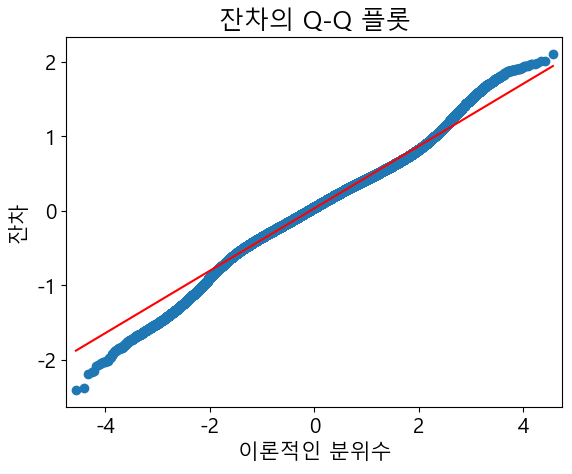

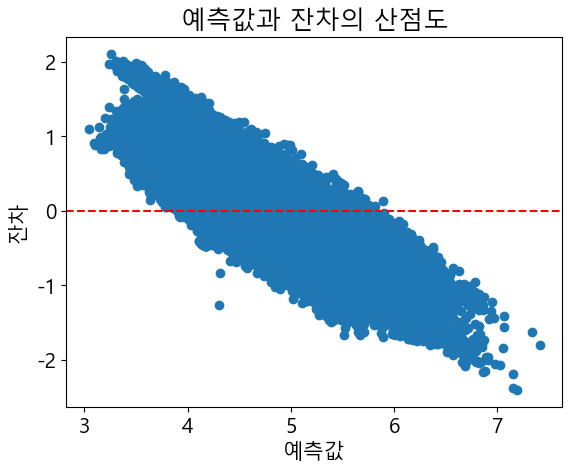

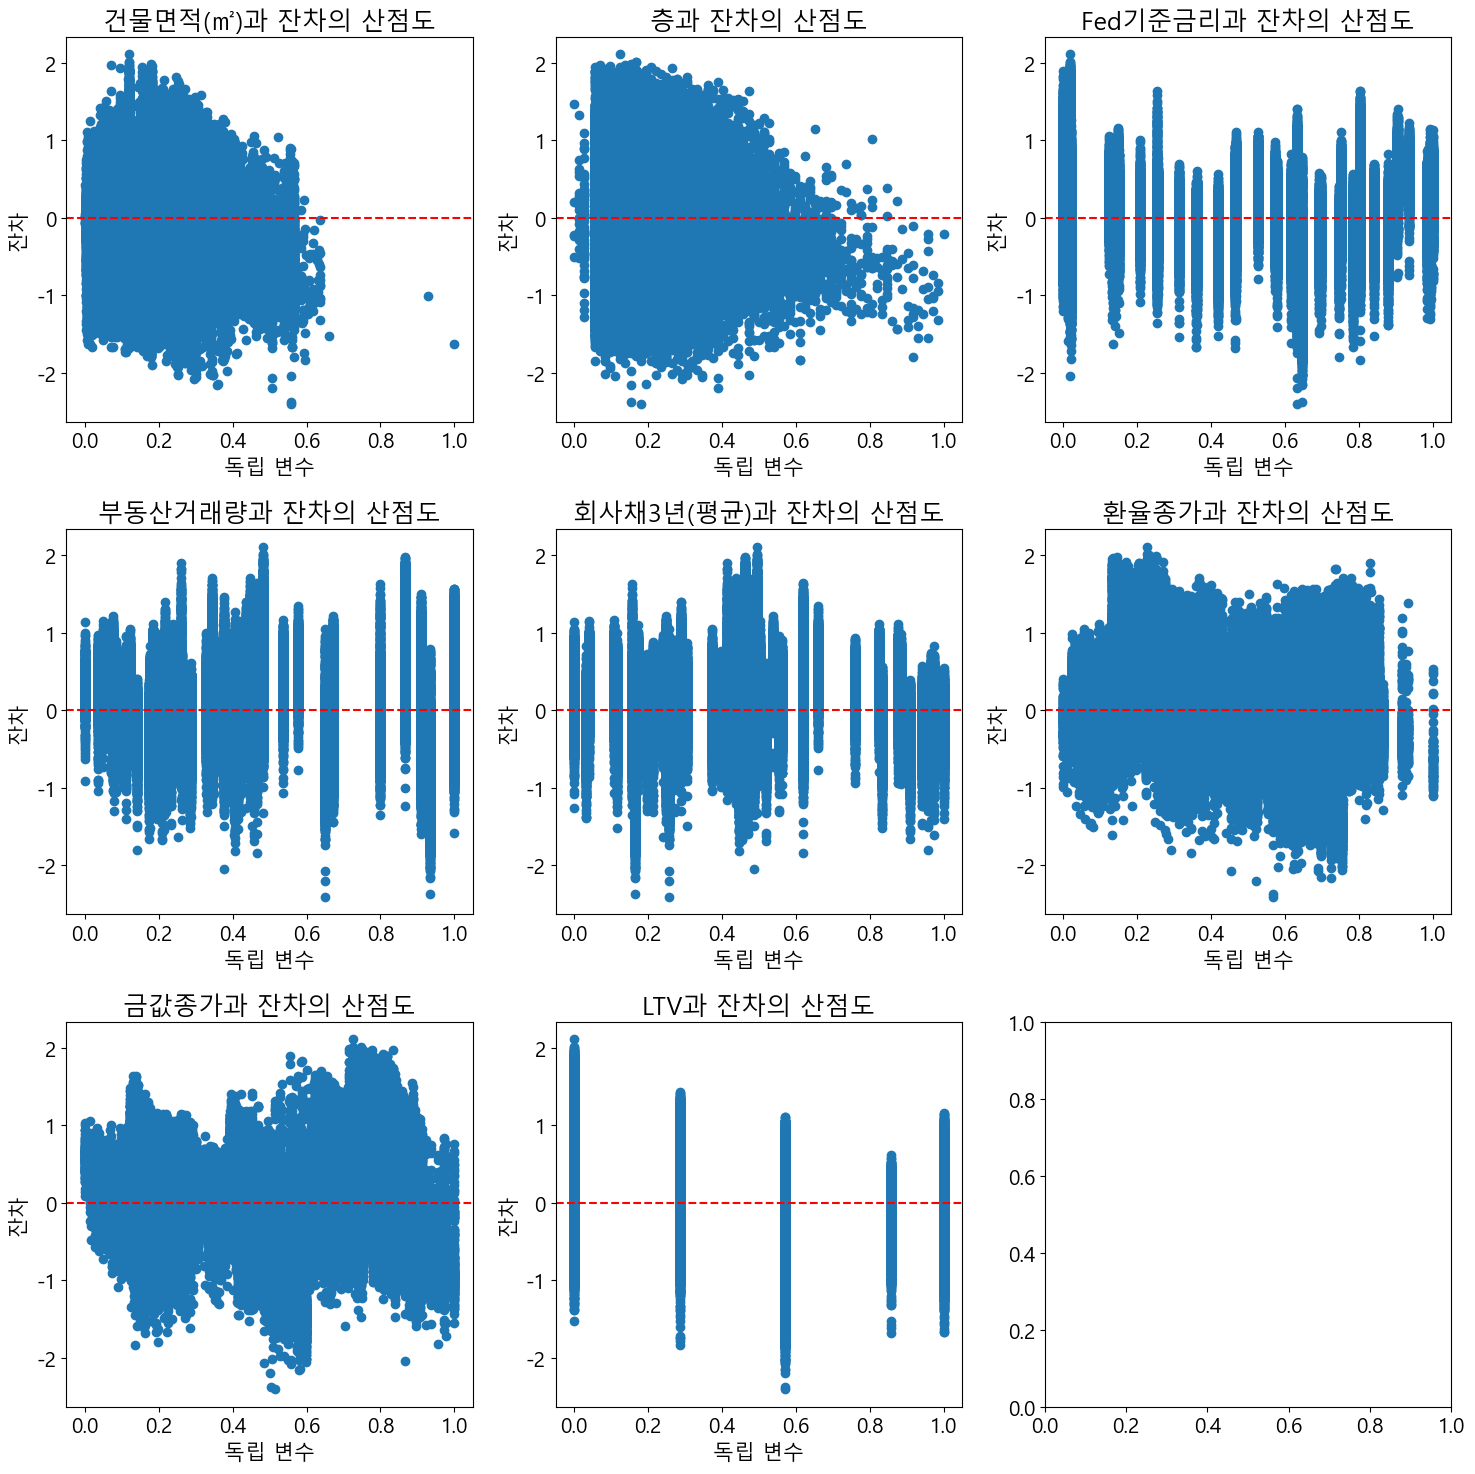

In [109]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()